# Cleaning candidatos

<a id = 'table'> </a>
## Table of contents

- Part I - Gathering the data
    - [Key Points](#key)
    - [Converting DTA to CSV file](#dta)
    - [Reading the CSV file](#read)    

- Part II - Assessing and cleaning
    - [Exploring the table](#explore)
    - [Making copies](#copies)
    - [Assesment and cleaning](#clean)
    - [Storing Data](#store)
    
- Part III - Analysis and visualization
    - [¿Cuál es el porcentaje de colocación?](#colocacion)
    - [¿En cuáles programas se originan las postulaciones?](#programa)
    - [Estatus final de vínculo](#vinculo)

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import sys

# for visualizing NAN
import missingno as msno
%matplotlib inline

# for visualizing all columns
pd.options.display.max_columns = None

<a id='key'></a>
[Return to Table of Contents](#table)

## Key Points for assessing and cleaning

- The BID2.CANDIDATO.dta file contains almost 2,350,000 records and 159 fields (columns).
- The analysis will focus on the next federal entities of the SNE ofices: Chiapas, Nuevo León, Jalisco, Veracruz, Ciudad de México, and Estado de México.
- Also, the analysis will be delimited to the next fields: 
    - id
    - id_solicitante
    - entidadfed_sne
    - sexo
    - edad
    - edocivil 
    - cedo_domicilio
    - nomb_localidad_domicilio
    - escolaridad
    - carrera
    - sit_academica
    - idioma
    - qempleobusca
    - salariopretente
    - tipoexperiencia
    - disp_viajar
    - disp_vivir
    - funciones
    - clen_idcvelengua 

In [ ]:
23

PRUEBA PRUEBA

In [3]:
my_iterator = pd.read_stata('BID2.CANDIDATO.dta', iterator=True)

In [7]:
start = time.time()

a_chunk = my_iterator.get_chunk(10000)
filter_cols = a_chunk.iloc[:,np.r_[0,1,2,4,6,8,9,11,14,15,16,19,54,55,60,61,62,70,71,119]]
    
filter_rows = filter_cols['entidadfed_sne'].isin(['CHIAPAS','NUEVO LEON','JALISCO','VERACRUZ','CIUDAD DE MEXICO','MEXICO, ESTADO DE'])
z = filter_cols[filter_rows]
z.to_csv('candidatosPrueba.csv', mode='a', index=False, header=False)   #‘a’ append.
 
end = time.time()
end-start

20.648345470428467

In [107]:
start = time.time()
# columnas a escoger
y = a_chunk.iloc[:,np.r_[0,1,2,4,6,8,9,11,14,15,16,19,54,55,60,61,62,70,71,119]]
end = time.time()
end - start


0.009138107299804688

In [114]:
z = pd.DataFrame()
filter_edo = y['entidadfed_sne'].isin(['CHIAPAS','NUEVO LEON','JALISCO','VERACRUZ','CIUDAD DE MEXICO','MEXICO, ESTADO DE'])
z = z.append(y[filter_edo])
type(filter_edo)

pandas.core.series.Series

In [102]:
z.shape

(126, 20)

In [38]:
%timeit y.at[i,'entidadfed_sne']

4.77 µs ± 24.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [39]:
%timeit y.loc[i,'entidadfed_sne']

7.73 µs ± 181 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [23]:
start = time.time()
x.loc[:,['id','id_solicitante','fch_registro','tsol_fch_nacimiento_2','cedo_nacimiento','cmun_nombre_domicilio']]
end = time.time()
end - start

0.0014042854309082031

In [24]:
df = a_chunk.query('trac_id == 12000')
df['id_solicitante'].unique()

array([14902401.])

<a id='dta'></a>
[Return to Table of Contents](#table)
## Converting DTA to CSV file

In [79]:
# creamos my_stata_reader, un objeto que nos permite leer por chunks (trozos)
my_stata_reader = pd.read_stata('BID2.CANDIDATO.dta', chunksize=10000, 
                                columns=['id','id_solicitante', 'entidadfed_sne', 'sexo', 'edad', 'edocivil', 
                                         'cedo_domicilio', 'nomb_localidad_domicilio','escolaridad', 'carrera', 
                                         'sit_academica', 'idioma', 'qempleobusca', 'salariopretente',
                                         'tipoexperiencia', 'disp_viajar', 'disp_vivir', 'funciones', 
                                         'clen_idcvelengua'])
my_stata_reader._encoding = 'utf-8'

In [80]:
# start y end medirán el tiempo
start = time.time()
first = True

# para cada chunk, hará lo siguiente:
for chunk in my_stata_reader:
    if first:        # hacer lo siguiente sólo con el primer chunk:
        filter_rows = chunk['entidadfed_sne'].isin(['CHIAPAS','NUEVO LEON','JALISCO','VERACRUZ','CIUDAD DE MEXICO','MEXICO, ESTADO DE'])
        z = chunk[filter_rows]
        # anexar las filas del chunk filtrado al CSV aniadiendo el header
        z.to_csv('candidatos.csv', mode='a', index=False, header=True)  #‘a’ append.                                                                        
        first = False
        
    # hacer lo siguiente con todos menos el primer chunk:
    # filtrar por entidadfed_sne
    # filter_rows es una lista de bools
    filter_rows = chunk['entidadfed_sne'].isin(['CHIAPAS','NUEVO LEON','JALISCO','VERACRUZ','CIUDAD DE MEXICO','MEXICO, ESTADO DE'])
    z = chunk[filter_rows]    
    # anexar las filas del chunk filtrado al CSV ignorando el header
    z.to_csv('candidatos.csv', mode='a', index=False, header=False) #‘a’ append.
    # imprimir un punto cada que anexa un chunk
    print('.', end = '')
end = time.time()
print (('Total time: ') + str(end - start))

...........................................................................................................................................................................................................................................Total time: 150.1243064403534


In [81]:
# Verifiquemos el tamanio del CSV
filesize= os.stat('candidatos.csv').st_size
print(filesize)

392914092


<a id='read'></a>
[Return to Table of Contents](#table)
## Reading the CSV

The successful use of pd.read_csv may vary because of the <b>file size, type of processor, memory, code,</b> or some other variables.

If the code runs out of memory, you can try reading in chunks.

In [82]:
candidatos = pd.read_csv('candidatos.csv')
candidatos.head(1)

,id,id_solicitante,entidadfed_sne,sexo,edad,edocivil,cedo_domicilio,nomb_localidad_domicilio,escolaridad,carrera,sit_academica,idioma,qempleobusca,salariopretente,tipoexperiencia,disp_viajar,disp_vivir,funciones,clen_idcvelengua
0,2347459,501,NUEVO LEON,MASCULINO,31,SOLTERO (A),HIDALGO,HUEJUTLA DE REYES,SIN INSTRUCCIÓN,Ninguna,ESTUDIANTE,NINGUNO,"Auxiliar, ayudante o aprendiz de rotulista",3000.0,NaN,NO,NO,NaN,No


<a id='explore'></a>
[Return to Table of Contents](#table)
## Exploring the table


In [83]:
candidatos.head()

,id,id_solicitante,entidadfed_sne,sexo,edad,edocivil,cedo_domicilio,nomb_localidad_domicilio,escolaridad,carrera,sit_academica,idioma,qempleobusca,salariopretente,tipoexperiencia,disp_viajar,disp_vivir,funciones,clen_idcvelengua
0,2347459,501,NUEVO LEON,MASCULINO,31,SOLTERO (A),HIDALGO,HUEJUTLA DE REYES,SIN INSTRUCCIÓN,Ninguna,ESTUDIANTE,NINGUNO,"Auxiliar, ayudante o aprendiz de rotulista",3000.0,NaN,NO,NO,NaN,No
1,2347300,117701,CHIAPAS,FEMENINO,33,SOLTERO (A),CHIAPAS,SAN CRISTOBAL DE LAS CASAS,LICENCIATURA,Contabilidad,PASANTE,NINGUNO,Asistente de gerencia administrativa,3300.0,NaN,NO,NO,NaN,No
2,2347299,125801,CHIAPAS,FEMENINO,27,SOLTERO (A),CHIAPAS,SAN CRISTOBAL DE LAS CASAS,PROFESIONAL TÉCNICO (CONALEP),Informática administrativa,DIPLOMA O CERTIFICADO,INGLÉS,Auxiliar contable,3000.0,NINGUNA,NO,NO,NaN,No
3,2347298,130401,CHIAPAS,MASCULINO,25,SOLTERO (A),CHIAPAS,SAN CRISTOBAL DE LAS CASAS,PREPA O VOCACIONAL,No especificado de nombre de carrera técnica o...,DIPLOMA O CERTIFICADO,NINGUNO,Capturista de datos,4250.0,NINGUNA,NO,NO,NaN,No
4,2347297,134201,CHIAPAS,MASCULINO,27,SOLTERO (A),CHIAPAS,SAN CRISTOBAL DE LAS CASAS,SECUNDARIA/SEC. TÉCNICA,Ninguna,DIPLOMA O CERTIFICADO,NINGUNO,Cajero,2500.0,NINGUNA,NO,NO,NaN,No


In [15]:
candidatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265855 entries, 0 to 1265854
Data columns (total 19 columns):
id                          1265855 non-null int64
id_solicitante              1265855 non-null int64
entidadfed_sne              1265855 non-null object
sexo                        1265855 non-null object
edad                        1265855 non-null int64
edocivil                    1265855 non-null object
cedo_domicilio              1265855 non-null object
nomb_localidad_domicilio    1265855 non-null object
escolaridad                 1265855 non-null object
carrera                     1265855 non-null object
sit_academica               1265855 non-null object
idioma                      1265855 non-null object
qempleobusca                1265855 non-null object
salariopretente             1265855 non-null float64
tipoexperiencia             535861 non-null object
disp_viajar                 1265855 non-null object
disp_vivir                  1265855 non-null object
funcio

In [16]:
candidatos[candidatos.duplicated()].sort_values(by='id_solicitante')

,id,id_solicitante,entidadfed_sne,sexo,edad,edocivil,cedo_domicilio,nomb_localidad_domicilio,escolaridad,carrera,sit_academica,idioma,qempleobusca,salariopretente,tipoexperiencia,disp_viajar,disp_vivir,funciones,clen_idcvelengua
1784,2347459,501,NUEVO LEON,MASCULINO,31,SOLTERO (A),HIDALGO,HUEJUTLA DE REYES,SIN INSTRUCCIÃN,Ninguna,ESTUDIANTE,NINGUNO,"Auxiliar, ayudante o aprendiz de rotulista",3000.0,NaN,NO,NO,NaN,No
1785,2347300,117701,CHIAPAS,FEMENINO,33,SOLTERO (A),CHIAPAS,SAN CRISTOBAL DE LAS CASAS,LICENCIATURA,Contabilidad,PASANTE,NINGUNO,Asistente de gerencia administrativa,3300.0,NaN,NO,NO,NaN,No
1786,2347299,125801,CHIAPAS,FEMENINO,27,SOLTERO (A),CHIAPAS,SAN CRISTOBAL DE LAS CASAS,PROFESIONAL TÃCNICO (CONALEP),InformÃ¡tica administrativa,DIPLOMA O CERTIFICADO,INGLÃS,Auxiliar contable,3000.0,NINGUNA,NO,NO,NaN,No
1787,2347298,130401,CHIAPAS,MASCULINO,25,SOLTERO (A),CHIAPAS,SAN CRISTOBAL DE LAS CASAS,PREPA O VOCACIONAL,No especificado de nombre de carrera tÃ©cnica ...,DIPLOMA O CERTIFICADO,NINGUNO,Capturista de datos,4250.0,NINGUNA,NO,NO,NaN,No
1788,2347297,134201,CHIAPAS,MASCULINO,27,SOLTERO (A),CHIAPAS,SAN CRISTOBAL DE LAS CASAS,SECUNDARIA/SEC. TÃCNICA,Ninguna,DIPLOMA O CERTIFICADO,NINGUNO,Cajero,2500.0,NINGUNA,NO,NO,NaN,No
1789,2347296,135301,CHIAPAS,MASCULINO,25,SOLTERO (A),CHIAPAS,SAN CRISTOBAL DE LAS CASAS,PREPA O VOCACIONAL,AdministraciÃ³n,DIPLOMA O CERTIFICADO,NINGUNO,Secretaria recepcionista,4250.0,NaN,NO,NO,NaN,NO
1790,2347256,172301,CHIAPAS,FEMENINO,32,SOLTERO (A),CHIAPAS,REFORMA,SECUNDARIA/SEC. TÃCNICA,Ninguna,DIPLOMA O CERTIFICADO,NINGUNO,Ayudante de cocina,3000.0,NINGUNO,SI,SI,NaN,No
1791,2347255,172401,CHIAPAS,MASCULINO,85,DIVORCIADO (A),CHIAPAS,26 DE OCTUBRE,SABER LEER Y ESCRIBIR,Ninguna,NINGUNO,NINGUNO,Panadero,2500.0,PANADERIA,NO,NO,NaN,No
1792,2347250,177401,CHIAPAS,MASCULINO,85,CASADO (A),CHIAPAS,BENITO JUAREZ,SABER LEER Y ESCRIBIR,Ninguna,NINGUNO,NINGUNO,Panadero,2500.0,NINGUNA,NO,NO,NaN,No
1793,2347246,181001,CHIAPAS,MASCULINO,25,SOLTERO (A),CHIAPAS,PALENQUE,SECUNDARIA/SEC. TÃCNICA,Ninguna,DIPLOMA O CERTIFICADO,NINGUNO,Empleado administrativo,2400.0,NINGUNA,NO,NO,NaN,No


In [11]:
candidatos.entidadfed_sne.unique()

array(['NUEVO LEON', 'CHIAPAS', 'VERACRUZ', 'JALISCO', 'CIUDAD DE MEXICO',
       'MEXICO, ESTADO DE'], dtype=object)

In [31]:
candidatos.edocivil.unique()

array(['SOLTERO (A)', 'DIVORCIADO (A)', 'CASADO (A)', 'VIUDO (A)',
       'UNION LIBRE', 'NO ESPECIFICADO'], dtype=object)

In [45]:
a = candidatos.cedo_domicilio.unique().tolist()
print(sorted(a))

['AGUASCALIENTES                     ', 'BAJA CALIFORNIA                    ', 'BAJA CALIFORNIA SUR                ', 'CAMPECHE                           ', 'CHIAPAS                            ', 'CHIHUAHUA                          ', 'CIUDAD DE MÃ\x89XICO', 'COAHUILA                           ', 'COLIMA                             ', 'DURANGO                            ', 'GUANAJUATO                         ', 'GUERRERO                           ', 'HIDALGO                            ', 'JALISCO                            ', 'MEXICO, ESTADO DE                  ', 'MICHOACAN                          ', 'MORELOS                            ', 'NAYARIT                            ', 'NUEVO LEON                         ', 'OAXACA                             ', 'PUEBLA                             ', 'QUERETARO                          ', 'QUINTANA ROO                       ', 'SAN LUIS POTOSI                    ', 'SINALOA                            ', 'SONORA                             ', 

In [48]:
candidatos.escolaridad.unique().tolist()

['SIN INSTRUCCIÃ\x93N',
 'LICENCIATURA',
 'PROFESIONAL TÃ\x89CNICO (CONALEP)',
 'PREPA O VOCACIONAL',
 'SECUNDARIA/SEC. TÃ\x89CNICA',
 'SABER LEER Y ESCRIBIR',
 'PRIMARIA',
 'T. SUPERIOR UNIVERSITARIO',
 'CARRERA TÃ\x89CNICA',
 'CARRERA COMERCIAL',
 'MAESTRÃ\x8dA',
 'DOCTORADO']

In [73]:
a = candidatos.carrera.unique().tolist()[2]
print (a)
print (sys.stdout.encoding)

InformÃ¡tica administrativa
UTF-8


In [65]:
a.decode()

AttributeError: 'str' object has no attribute 'decode'

In [ ]:
a = candidatos.escolaridad.unique().tolist()
print(sorted(a))

1265855 entries
nomb_localidad_domicilio	escolaridad	carrera	sit_academica	idioma	qempleobusca	salariopretente	tipoexperiencia	disp_viajar	disp_vivir	funciones	clen_idcvelengua
In `entidadfed_sne` use 'ESTADO DE MEXICO' instead of 'MEXICO, ESTADO DE' 
Some candidates have unexpected values for `age`. Values from 3 to 14 years will be changed for the average age.
Values in `cedo_domicilio` end with lots of spaces.


In [30]:
candidatos.groupby('edad')['id'].nunique()


edad
3         3
4         2
7         1
9         3
10        1
11        1
13        2
14        1
15        6
16       22
17      344
18     3929
19    11082
20    23908
21    32622
22    40658
23    55466
24    73174
25    82054
26    83177
27    78600
28    71948
29    63463
30    55912
31    49820
32    44175
33    39819
34    36437
35    34059
36    31312
      ...  
67     1430
68     1264
69     1038
70      918
71      869
72      666
73      610
74      504
75      444
76      409
77      335
78      259
79      227
80      166
81      138
82      137
83      116
84       87
85       65
86       59
87       44
88       34
89       13
90       14
91       11
92       15
93        9
94        3
95        1
96        1
Name: id, Length: 90, dtype: int64

In [17]:
candidatos.sexo.value_counts()

MASCULINO    677733
FEMENINO     588122
Name: sexo, dtype: int64

In [20]:
candidatos['idioma'].value_counts()

NINGUNO       806750
INGLÃS       448626
FRANCÃS        5452
ITALIANO        2006
ALEMÃN         1201
PORTUGUÃS      1069
JAPONÃS         560
CHINO            191
Name: idioma, dtype: int64

In [21]:
candidatos['funciones'].value_counts()

\t\t\t\t\t                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   118242
NINGUNO                                                                                                             

In [8]:
candidatos.escolaridad.unique()

array(['SIN INSTRUCCIÃ\x93N', 'LICENCIATURA',
       'PROFESIONAL TÃ\x89CNICO (CONALEP)', 'PREPA O VOCACIONAL',
       'SECUNDARIA/SEC. TÃ\x89CNICA', 'SABER LEER Y ESCRIBIR', 'PRIMARIA',
       'T. SUPERIOR UNIVERSITARIO', 'CARRERA TÃ\x89CNICA',
       'CARRERA COMERCIAL', 'MAESTRÃ\x8dA', 'DOCTORADO'], dtype=object)

Hay 3 tipos de vínculos: postulación, envío e inscripción. Hay que arreglar los textos

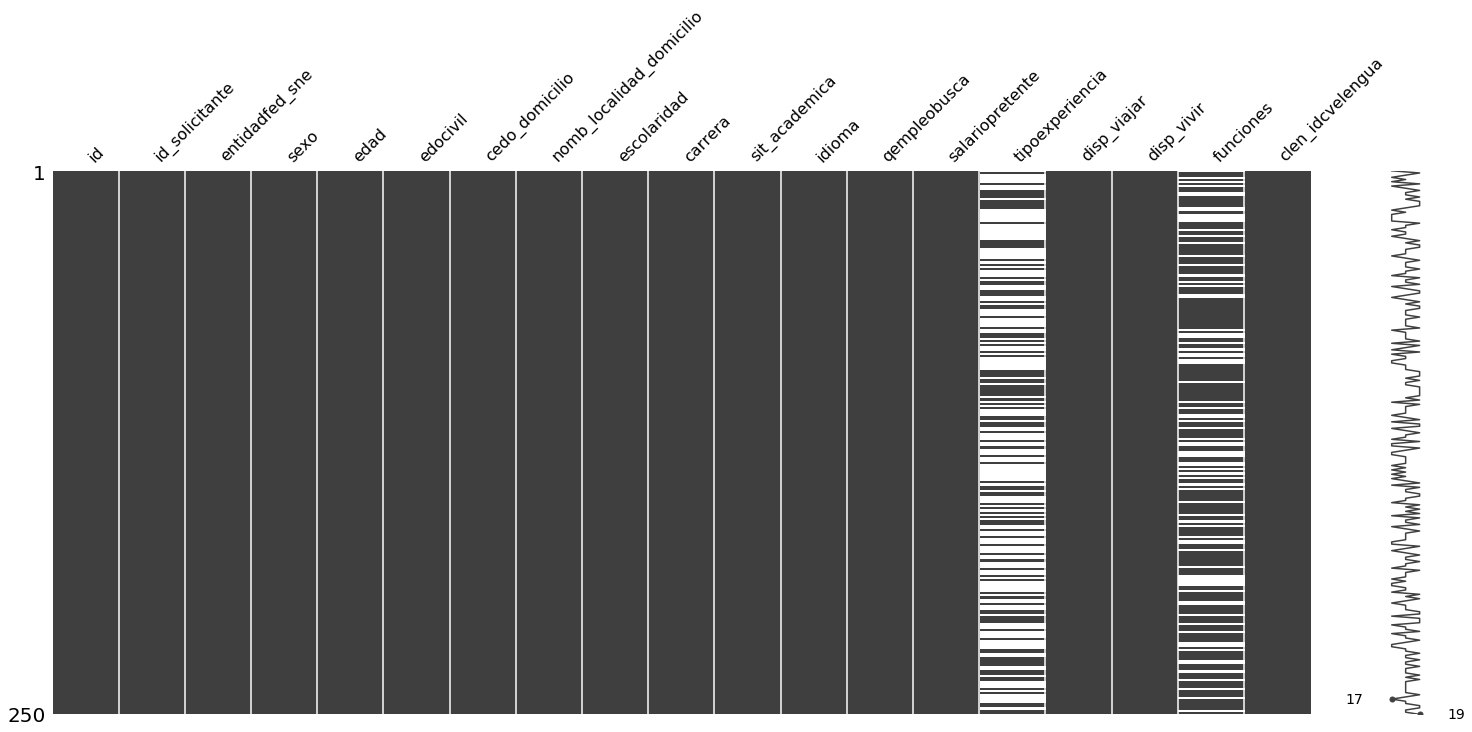

In [8]:
#NaN in candidatos
candidatos = candidatos.replace("nan",np.nan)
msno.matrix(candidatos.sample(250));

In [10]:
candidatos.idioma.value_counts()

NINGUNO       806750
INGLÃS       448626
FRANCÃS        5452
ITALIANO        2006
ALEMÃN         1201
PORTUGUÃS      1069
JAPONÃS         560
CHINO            191
Name: idioma, dtype: int64

<a id='copies'></a>
[Return to Table of Contents](#table)
## Making copies

The first step before any cleaning is **always make copies**

In [12]:
candidatos_clean = candidatos.copy()

<a id='clean'></a>[Return to Table of Contents](#table)
## Assesment and cleaning
#### Quality changes
1. [Not relevant columns must be removed](#drop_cols)
2. ['trac_id','id_solicitante', and 'id_empresa' have wrong datatype](#to_int)
3. ['tipo_vinculo' values have errors from the encoding](#tipo_vinculo) 

#### Tidiness changes
Not a single so far.

<a id='drop_cols'></a>
### 1. Not relevant columns must be removed
The columns `fechainiciovacante, fecha_finalvinculo, fuente` are not relevant for the final research. These columns will be deleted with the df.drop function

In [24]:
# where 1 is the axis number (0 for rows and 1 for columns.)
postulaciones_clean = postulaciones_clean.drop(['fechainiciovacante', 'fecha_finalvinculo', 'fuente'],1)

# Verify the selected columns have been removed 
postulaciones_clean.columns.get_values()

array(['trac_id', 'id_solicitante', 'id_oferta_empleo', 'id_empresa',
       'fecha_vinculo', 'tipo_vinculo', 'estatusfinalvinculo',
       'subprograma', 'anio'], dtype=object)

<a id='to_int'></a>
### 2. 'trac_id','id_solicitante', and 'id_empresa' have wrong datatype
Must be changed from float64 to int

In [25]:
postulaciones_clean['trac_id'] =  postulaciones_clean['trac_id'].astype(int)
postulaciones_clean['id_solicitante'] =  postulaciones_clean['id_solicitante'].astype(int)
postulaciones_clean['id_empresa'] =  postulaciones_clean['id_empresa'].astype(int)

In [26]:
# Verify new datatype
postulaciones_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6283233 entries, 0 to 6283232
Data columns (total 9 columns):
trac_id                int64
id_solicitante         int64
id_oferta_empleo       int64
id_empresa             int64
fecha_vinculo          object
tipo_vinculo           object
estatusfinalvinculo    object
subprograma            object
anio                   int64
dtypes: int64(5), object(4)
memory usage: 431.4+ MB


<a id='tipo_vinculo'></a>
### 3. tipo_vinculo values have errors from the encoding
Write 'POSTULACION' instead of 'PUSTULACIÃ\x93N' and 'ENVIO' instead of 'ENVÃ\x8dO'. 

Use the replace function and regular expressions (regex)

In [33]:
postulaciones_clean = postulaciones_clean.replace({'tipo_vinculo':r'(PUSTULAC).*(N)$'}, {'tipo_vinculo':'POSTULACIÓN'}, regex=True)
postulaciones_clean = postulaciones_clean.replace({'tipo_vinculo':r'(ENV).*(O)$'}, {'tipo_vinculo':'ENVÍO'}, regex=True)
postulaciones_clean = postulaciones_clean.replace({'tipo_vinculo':r'INSCRIPCION'}, {'tipo_vinculo':'INSCRIPCIÓN'}, regex=True)

In [34]:
# Verify tipo_vinculo
postulaciones_clean['tipo_vinculo'].unique()

array(['POSTULACIÓN', 'ENVÍO', 'INSCRIPCIÓN'], dtype=object)

<a id='store'></a>[Return to Table of Contents](#table)
## Storing Data

First, we'll get a sample of `postulaciones` to verify it is the way we need it.

In [45]:
postulaciones_clean.sample(5)

,trac_id,id_solicitante,id_oferta_empleo,id_empresa,fecha_vinculo,tipo_vinculo,estatusfinalvinculo,subprograma,anio
3224398,0,1187756002,2714017,15507290,2016-11-14 00:00:00,POSTULACIÓN,NO COLOCADO,PORTAL,2016
2649748,0,1095811502,2535242,15444673,2016-08-22 00:00:00,POSTULACIÓN,NO COLOCADO,SIISNE,2016
4107751,0,789287302,2498729,15422330,2016-07-25 00:00:00,POSTULACIÓN,NO COLOCADO,PORTAL,2016
963955,0,668813902,2604158,15097325,2016-09-17 00:00:00,POSTULACIÓN,NO COLOCADO,PORTAL,2016
5309524,0,1057416702,2654024,15486132,2016-10-18 00:00:00,POSTULACIÓN,COLOCADO,FERIAS,2016


Then proceed to save it. Make sure to specify index=False and utf-8 encoding.

utf-8 ensures that special characters in Spanish as accents and ñ will be saved.

In [36]:
postulaciones_clean.to_csv('postulaciones_clean.csv', index=False, encoding='utf-8')

<a id='colocacion'></a>
[Return to Table of Contents](#table)
## Analysis and visualization
After wrangling and cleaning data from `postulaciones` we can try some univariate exploration.

In this first attempt we are not adding the gender variable yet.

In [ ]:
# Run this line if you don't have the dataframe postulaciones_clean
postulaciones_clean = pd.read_csv('postulaciones_clean.csv', encoding='utf-8')

### ¿Cuál es el porcentaje de colocación?

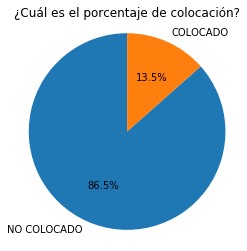

In [3]:
postulaciones_clean['estatusfinalvinculo'].value_counts().plot(kind = 'pie', startangle=90, autopct='%1.1f%%')
plt.axis('square')
plt.title('¿Cuál es el porcentaje de colocación?')
plt.ylabel('');

<a id='programa'></a>
[Return to Table of Contents](#table)
### ¿En cuáles programas se originan las postulaciones?


In [4]:
subprogramas_count = postulaciones_clean['subprograma'].value_counts()
subprogramas_count

PORTAL               4840986
SIISNE               1246746
FERIAS                191840
Abriendo Espacios       3565
BECATE                    49
MOV LAB INT               29
OTRO                      18
Name: subprograma, dtype: int64

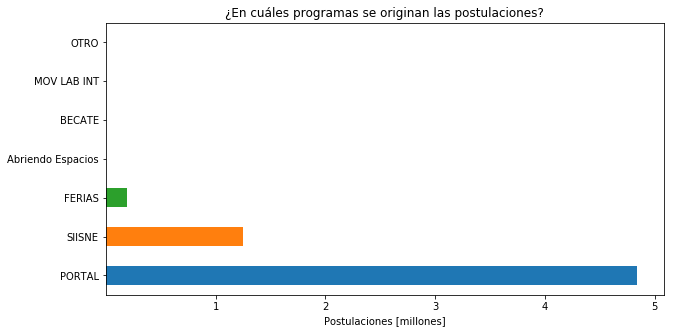

In [7]:
subprogramas_count.plot(kind = 'barh', figsize=(10,5))
plt.title('¿En cuáles programas se originan las postulaciones?')
plt.xlabel('Postulaciones [millones]')
xticklocs = np.arange(1000000, 5000001, 1000000) #(start of interval, end of interval, spacing between values)
xticknames = [1,2,3,4,5]
plt.xticks(xticklocs, xticknames);

<a id='vinculo'></a>
[Return to Table of Contents](#table)
### ¿Qué proporciones tienen los diferentes vínculos?


In [13]:
vinculos_count = postulaciones_clean['tipo_vinculo'].value_counts()
vinculos_count

POSTULACIÓN    5897688
ENVÍO           385467
INSCRIPCIÓN         78
Name: tipo_vinculo, dtype: int64

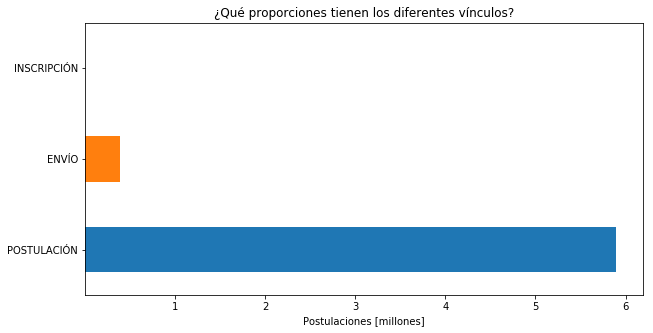

In [16]:
vinculos_count.plot(kind = 'barh', figsize=(10,5))
plt.title('¿Qué proporciones tienen los diferentes vínculos?')
plt.xlabel('Postulaciones [millones]')
xticklocs = np.arange(1000000, 6000001, 1000000) #(start of interval, end of interval, spacing between values)
xticknames = [1,2,3,4,5,6]
plt.xticks(xticklocs, xticknames);

In [ ]:
from pywaffle import Waffle
calculated = postulaciones_clean['tipo_vinculo'].value_counts()

fig = plt.figure(FigureClass=Waffle, 
    rows=5,
    values = list(calculated.values),
    labels = list(calculated.index)
)

## References
pd.isin()
- https://www.geeksforgeeks.org/python-pandas-dataframe-isin/

Obtener y filtrar datos de un dataframe
- http://pyciencia.blogspot.com/2015/05/obtener-y-filtrar-datos-de-un-dataframe.html
- https://medium.com/@rtjeannier/pandas-101-cont-9d061cb73bfc